In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/第01章/人事評価結果.csv', encoding='shift_jis')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      800 non-null    int64 
 1   性別      800 non-null    object
 2   部署      800 non-null    object
 3   年代      800 non-null    object
 4   協調性     800 non-null    int64 
 5   自己主張    800 non-null    int64 
 6   技能      800 non-null    int64 
 7   知識      800 non-null    int64 
 8   ストレス    800 non-null    int64 
 9   総合      800 non-null    int64 
 10  昨年総合    800 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 68.9+ KB


,ID,性別,部署,年代,協調性,自己主張,技能,知識,ストレス,総合,昨年総合
0,1,M,A部,中堅,70,45,65,71,53,251,248
1,2,F,B部,熟練,45,62,51,72,64,227,211
2,3,M,A部,中堅,54,70,55,70,61,249,242
3,4,M,A部,熟練,51,63,53,65,60,232,240
4,5,F,A部,若手,56,52,44,68,56,217,177


In [3]:
data.columns = [
    'id',
    'gender',
    'department',
    'age',
    'cooperativeness',
    'assertiveness',
    'skill',
    'knowledge',
    'stress',
    'total',
    'lastyear'
]

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='stress', ylabel='Count'>

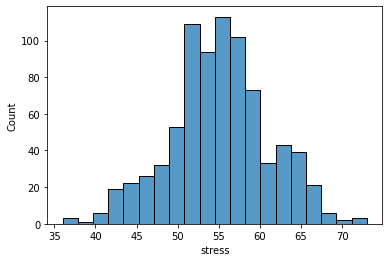

In [5]:
sns.histplot(data['stress'], bins=20)

In [6]:
data['stress'].mean()

55.0525

In [7]:
data['stress'].median()

55.0

In [8]:
data['age'].value_counts()

若手    315
中堅    308
熟練    177
Name: age, dtype: int64

In [9]:
data['stress'].std()

6.0228803416232575

In [10]:
data['stress'].var()

36.275087609511885

In [11]:
import numpy as np

# varは不偏分散
mean_stress = data['stress'].mean()

print('標本分散:')
print(np.sum((data['stress'] - mean_stress) ** 2) / len(data))

print('不偏分散:')
print(np.sum((data['stress'] - mean_stress) ** 2) / (len(data) - 1))

標本分散:
36.22974375
不偏分散:
36.275087609511885


In [12]:
# stdは不偏標準偏差
data['stress'].std() ** 2

36.275087609511885

In [13]:
# 平均偏差
np.mean(np.abs(data['stress'] - data['stress'].median()))

4.7325

In [14]:
age_transform = {
    '若手': 'young',
    '中堅': 'middle',
    '熟練': 'old'
}

data['age'] = data['age'].map(lambda x: age_transform[x])

data['age'].value_counts()

young     315
middle    308
old       177
Name: age, dtype: int64

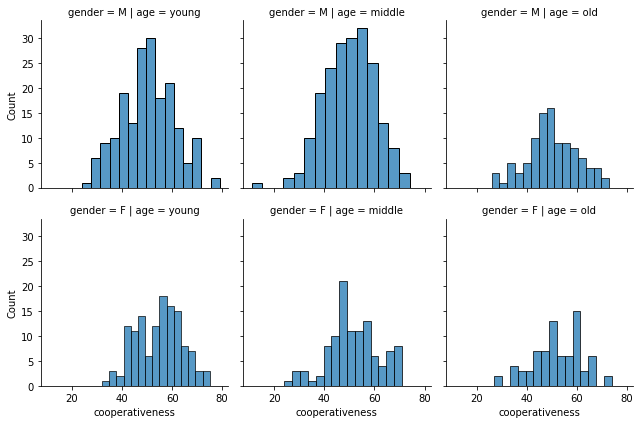

In [15]:
sns.FacetGrid(data, col='age', col_order=['young', 'middle', 'old'], row='gender', row_order=['M', 'F']) \
    .map(sns.histplot, 'cooperativeness', bins=15)

In [16]:
data.groupby('gender')['cooperativeness'].mean()

gender
F    52.921136
M    50.055901
Name: cooperativeness, dtype: float64

In [17]:
data.groupby('gender')['cooperativeness'].std()

gender
F     9.845809
M    10.116078
Name: cooperativeness, dtype: float64

<AxesSubplot:>

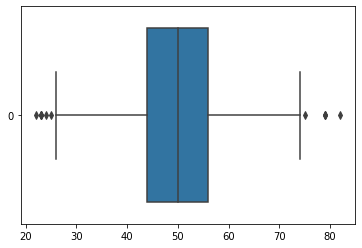

In [18]:
sns.boxplot(data=data['skill'], orient='h')

<AxesSubplot:xlabel='skill', ylabel='gender'>

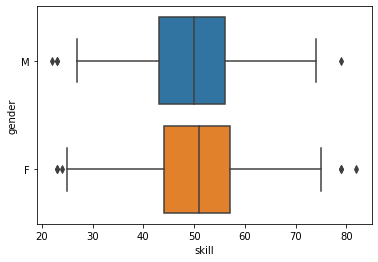

In [19]:
sns.boxplot(y=data['gender'], x=data['skill'], orient='h')

In [20]:
data['skill'].describe()

count    800.000000
mean      50.006250
std       10.006567
min       22.000000
25%       44.000000
50%       50.000000
75%       56.000000
max       82.000000
Name: skill, dtype: float64

In [21]:
from scipy.stats import ttest_ind

coop_m = data.query('gender == "M"')['cooperativeness']
coop_f = data.query('gender == "F"')['cooperativeness']
ttest_ind(coop_m, coop_f, equal_var=False)

Ttest_indResult(statistic=-3.9822668357027786, pvalue=7.551899451158485e-05)

In [22]:
from scipy.stats import ttest_rel

ttest_rel(data['total'], data['lastyear'])

Ttest_relResult(statistic=0.8511848435948919, pvalue=0.3949217026484646)

<AxesSubplot:xlabel='gender', ylabel='cooperativeness'>

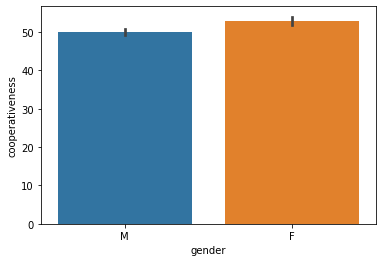

In [23]:
sns.barplot(x=data['gender'], y=data['cooperativeness'])

In [24]:
from scipy.stats import t

def get_interval(ser):
    dof = len(ser) - 1
    mean = ser.mean()
    se = ser.std() / np.sqrt(len(ser))
    return t.interval(0.95, dof, mean, se)

In [25]:
get_interval(coop_m)

(49.15146302524397, 50.96033821699206)

In [26]:
get_interval(coop_f)

(51.83311677287796, 54.00915452049743)

In [27]:
cols = ['cooperativeness', 'assertiveness', 'skill', 'knowledge']
data2 = data[['gender'] + cols]

In [28]:
data2[cols].agg(['mean', 'std'])

,cooperativeness,assertiveness,skill,knowledge
mean,51.191250,58.005000,50.006250,63.003750
std,10.101471,11.992905,10.006567,7.995539


In [29]:
data2[cols].agg(['sum', 'std'], axis=1).head()

,sum,std
0,251.0,12.120919
1,230.0,11.958261
2,249.0,8.958236
3,232.0,7.023769
4,220.0,10.000000


In [30]:
data.groupby('gender')[cols].agg(['mean', 'std'])

cooperativeness            assertiveness                 skill  \
                  mean        std          mean        std       mean   
gender                                                                  
F            52.921136   9.845809     57.416404  11.233291  50.378549   
M            50.055901  10.116078     58.391304  12.462645  49.761905   

                   knowledge            
              std       mean       std  
gender                                  
F       10.153034  63.056782  7.662786  
M        9.912231  62.968944  8.214264

In [31]:
from sklearn.preprocessing import StandardScaler

data2_std = pd.DataFrame(StandardScaler().fit_transform(data2[cols]), columns=cols)
data2_std.head()

,cooperativeness,assertiveness,skill,knowledge
0,1.863146,-1.085070,1.499328,1.000715
1,-0.613289,0.333322,0.099372,1.125863
2,0.278228,1.000800,0.499359,0.875567
3,-0.018945,0.416757,0.299366,0.249827
4,0.476342,-0.501026,-0.600606,0.625271


In [32]:
# StandardScalerでは標本標準偏差を使っている
(data2_std * np.sqrt(799 / 800)).head()

,cooperativeness,assertiveness,skill,knowledge
0,1.861981,-1.084391,1.498391,1.000089
1,-0.612906,0.333114,0.099310,1.125159
2,0.278054,1.000175,0.499047,0.875019
3,-0.018933,0.416496,0.299179,0.249670
4,0.476045,-0.500713,-0.600231,0.624880


<AxesSubplot:xlabel='skill', ylabel='knowledge'>

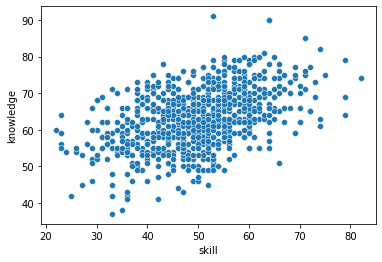

In [33]:
sns.scatterplot(x=data['skill'], y=data['knowledge'])

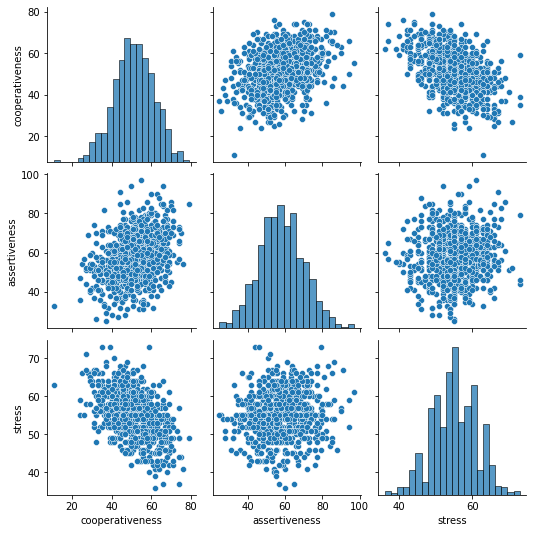

In [34]:
sns.pairplot(data[['cooperativeness', 'assertiveness', 'stress']])

In [35]:
data['department'] = data['department'].str[0]
data['department'].value_counts()

A    424
B    376
Name: department, dtype: int64

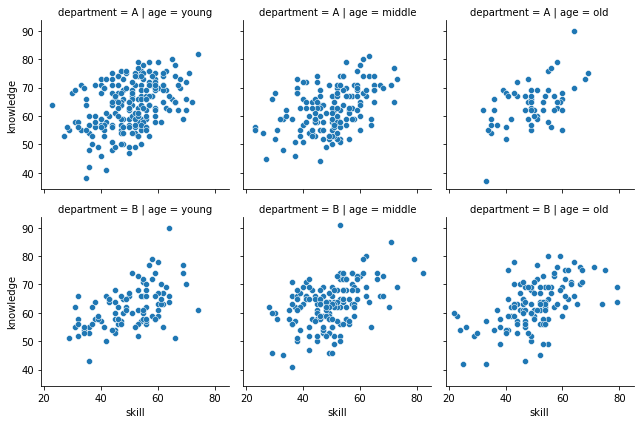

In [36]:
sns.FacetGrid(data, col='age', col_order=['young', 'middle', 'old'], row='department', row_order=['A', 'B']) \
    .map(sns.scatterplot, 'skill', 'knowledge')